## Set up paths and imports

In [1]:
import os
if not os.path.exists("./notebooks"):
    %cd ..

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression, lasso_path
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from src.log_reg_ccd import LogRegCCD
from itertools import cycle

/home/mytkom/Documents/DataScience/AML/Projects/LogRegCCD


Test Accuracy: 0.7900
[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.         -0.91945625  0.          0.          0.          0.
  0.          0.        ]


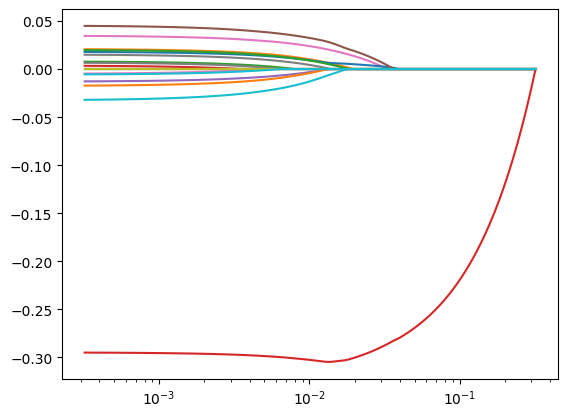

Number of selected features: 1
Non-zero coefficients: [-0.91945625]
intercept: [0.]


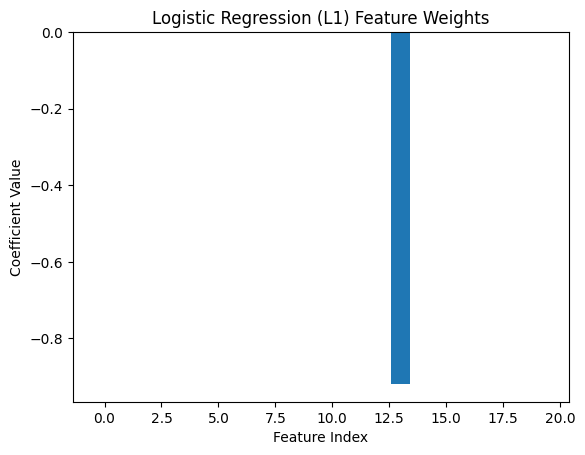

In [2]:
# Generate synthetic dataset
X, y = make_classification(
    n_samples=1000, n_features=20, n_informative=5, n_redundant=5, 
    n_classes=2, random_state=42
)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

# Train Logistic Regression with L1 penalty (Lasso)
model = LogisticRegression(penalty='l1', solver='liblinear', C=0.01)
model.fit(X_train, y_train)

# Predict and evaluate accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Display non-zero coefficients to check feature selection
coefficients = model.coef_.flatten()
print(coefficients)
num_selected_features = np.sum(coefficients != 0)

alphas_lasso, coefs_lasso, _ = lasso_path(X_train, y_train)
plt.figure(1)
for i, coef_lasso in enumerate(coefs_lasso):
    plt.semilogx(alphas_lasso, coef_lasso, label=f"{i}")
plt.show()

print(f"Number of selected features: {num_selected_features}")
print(f"Non-zero coefficients: {coefficients[coefficients != 0]}")
print(f"intercept: {model.intercept_}")

# Plot feature coefficients
plt.bar(range(len(coefficients)), coefficients)
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.title("Logistic Regression (L1) Feature Weights")
plt.show()


LogRegCCD:  Number of features: 20
LogRegCCD:  Lambdas space: [1.         0.46415888 0.21544347 0.1        0.04641589 0.02154435
 0.01       0.00464159 0.00215443 0.001     ]
LogRegCCD:  Fold 1
LogRegCCD:  Train shape: (720, 20)
LogRegCCD:  Validation shape: (80, 20)
LogRegCCD:  Early stopping Coordinate Descent in iteration: 2
LogRegCCD:  Lambda 1.0: Fold 1 Validation Loss = 1.5765 Beta: [-1. -0.  0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0. -0. -0. -0.
  0.  0.  0.]
LogRegCCD:  Early stopping Coordinate Descent in iteration: 1
LogRegCCD:  Lambda 0.46415888336127775: Fold 1 Validation Loss = 1.5765 Beta: [-1. -0.  0.  0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0. -0. -0. -0.
  0.  0.  0.]
LogRegCCD:  Early stopping Coordinate Descent in iteration: 60
LogRegCCD:  Lambda 0.21544346900318823: Fold 1 Validation Loss = 2.4755 Beta: [-0.02457616 -0.          0.          0.          0.          0.
  0.          0.          0.         -0.         -0.02849157  0.0672235
 -0.14578569  0.

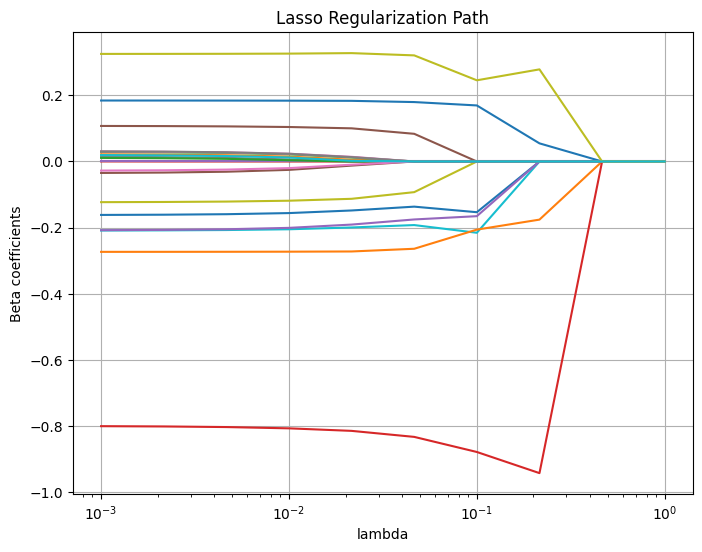

LogRegCCD:  Max measure value: 0.5000 for lambda: 1.0, beta values: [-1. -0.  0.  0.  0. -0.  0.  0.  0. -0. -0.  0. -0.  0. -0. -0. -0. -0.
  0.  0.  0.]
LogRegCCD:  Max measure value: 0.7917 for lambda: 0.1, beta values: [-0.00289052 -0.15335284  0.          0.          0.          0.
  0.          0.          0.         -0.         -0.21550669  0.16943299
 -0.20600736  0.         -0.8782425  -0.16532124 -0.         -0.
  0.          0.24544621  0.        ]


In [5]:
import src.measures as measure

model = LogRegCCD(verbose=True)
model.fit(X_train, y_train, lam_max=1, lam_count=10)

# Predict and evaluate accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")
print(model.best_beta)
model.plot_lasso_path()

model.validate(X_test, y_test, measure=measure.AUCROC())
model.validate(X_test, y_test, measure=measure.FMeasure())
